## Data loading

### Subtask:
Load the "India_Air_Quality_data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "India_Air_Quality_data.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('India_Air_Quality_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'India_Air_Quality_data.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Aurangabad,"Gurdeo Nagar, Aurangabad - BSPCB",02-05-2025 08:00:00,24.757460,84.366208,OZONE,11.0,79.0,44.0
1,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",02-05-2025 08:00:00,25.427420,86.138861,PM2.5,NaN,NaN,NaN
2,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",02-05-2025 08:00:00,25.427420,86.138861,NO2,42.0,107.0,72.0
3,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",02-05-2025 08:00:00,26.803650,84.519540,OZONE,22.0,24.0,23.0
4,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",02-05-2025 08:00:00,25.251013,86.989001,NH3,1.0,2.0,2.0


(3119, 11)
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of columns, and the distribution of key variables like PM2.5, PM10, etc. Check for the presence of outliers. Determine the overall shape and size of the dataset.


**Reasoning**:
Examine the dataset's structure, missing values, data types, and distributions of key variables, along with potential outliers and the overall shape, using `.info()`, `.describe()`, histograms, and correlation analysis.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3119 non-null   object 
 1   state          3119 non-null   object 
 2   city           3119 non-null   object 
 3   station        3119 non-null   object 
 4   last_update    3119 non-null   object 
 5   latitude       3119 non-null   float64
 6   longitude      3119 non-null   float64
 7   pollutant_id   3119 non-null   object 
 8   pollutant_min  2869 non-null   float64
 9   pollutant_max  2869 non-null   float64
 10  pollutant_avg  2869 non-null   float64
dtypes: float64(5), object(6)
memory usage: 268.2+ KB
None
          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3119.000000  3119.000000    2869.000000    2869.000000    2869.000000
mean     22.345844    78.835301      21.928895      71.789822      38.062043
std       5.510851     4.915329

<Figure size 1200x600 with 0 Axes>

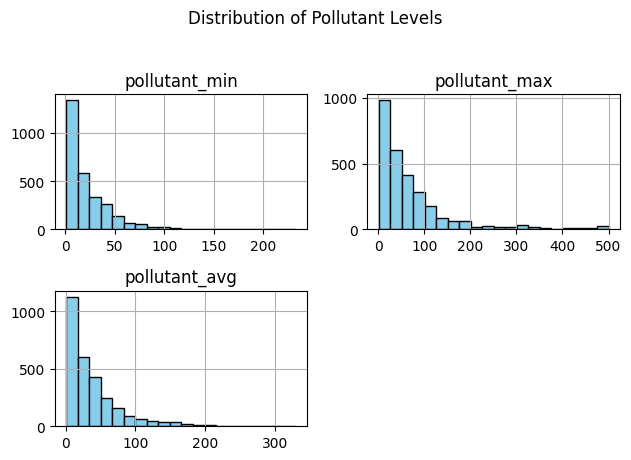

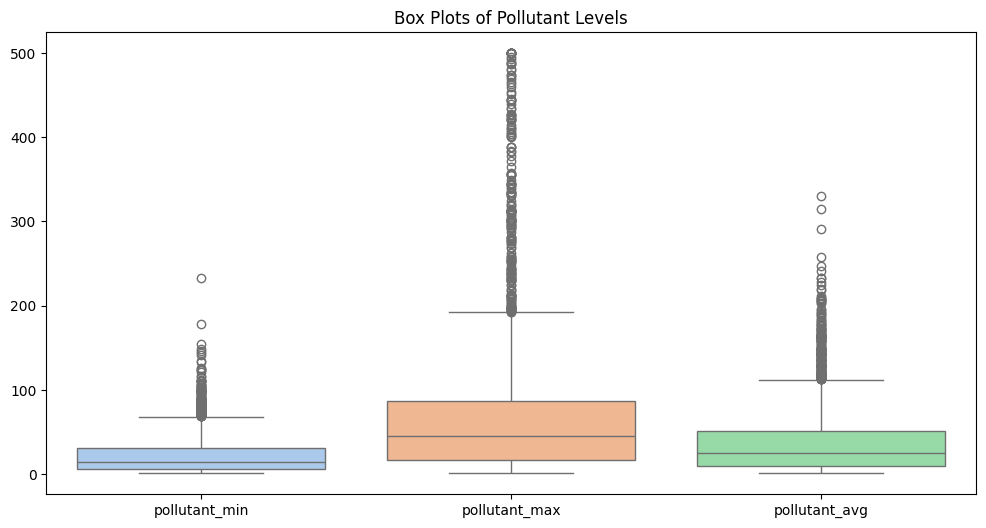

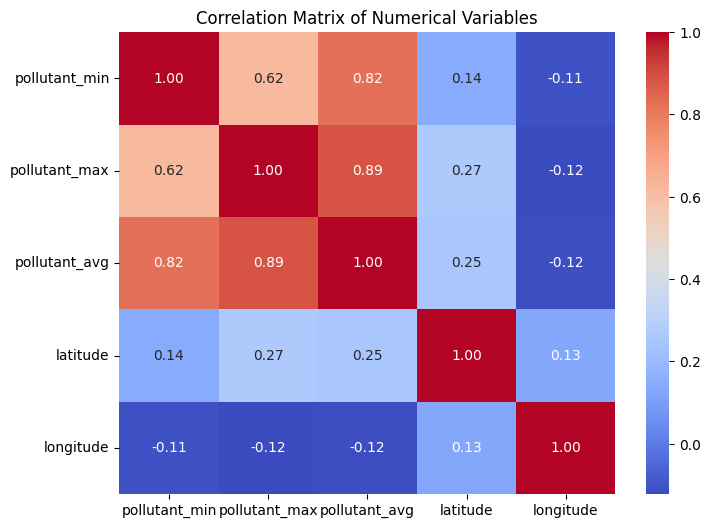

Unique Cities: ['Aurangabad' 'Begusarai' 'Bettiah' 'Bhagalpur' 'Naharlagun' 'Byrnihat'
 'Guwahati' 'Kishanganj' 'Manguraha' 'Munger' 'Amaravati' 'Anantapur'
 'Chittoor' 'Vijayawada' 'Tirumala' 'Gaya' 'Katihar' 'Nagaon' 'Silchar'
 'Bihar Sharif' 'Buxar' 'Chhapra' 'Arrah' 'Chandigarh' 'Bhilai'
 'Muzaffarpur' 'Patna' 'Kunjemura' 'Milupara' 'Raipur' 'Bilaspur' 'Chhal'
 'Korba' 'Samastipur' 'Sasaram' 'Purnia' 'Siwan' 'Delhi' 'Gandhinagar'
 'Surat' 'Vapi' 'Vatva' 'Ahmedabad' 'Bengaluru' 'Gurugram' 'Baddi'
 'Srinagar' 'Bagalkot' 'Yadgir' 'Eloor' 'Kannur' 'Kollam'
 'Thiruvananthapuram' 'Thrissur' 'Bhopal' 'Gwalior' 'Indore' 'Dharwad'
 'Hubballi' 'Kalaburagi' 'Koppal' 'Chamarajanagar' 'Chikkamagaluru'
 'Davanagere' 'Jabalpur' 'Dewas' 'Bidar' 'Mysuru' 'Shivamogga' 'Ujjain'
 'Ahmednagar' 'Akola' 'Amravati' 'Katni' 'Mandideep' 'Pithampur' 'Ratlam'
 'Mumbai' 'Sagar' 'Singrauli' 'Kalyan' 'Kolhapur' 'Latur' 'Jalgaon'
 'Jalna' 'Mahad' 'Malegaon' 'Mira-Bhayandar' 'Badlapur' 'Bhiwandi'
 'Boisar' 'Chandr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display information about the DataFrame
print(df.info())

# Descriptive statistics for numerical columns
print(df.describe())

# Histograms for key air quality variables
plt.figure(figsize=(12, 6))
df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].hist(bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Pollutant Levels')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Box plots for key air quality variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['pollutant_min', 'pollutant_max', 'pollutant_avg']], palette='pastel')
plt.title('Box Plots of Pollutant Levels')
plt.show()

# Correlation matrix
corr_matrix = df[['pollutant_min', 'pollutant_max', 'pollutant_avg', 'latitude', 'longitude']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Unique values in categorical columns
print("Unique Cities:", df['city'].unique())
print("Unique States:", df['state'].unique())
print("Unique Countries:", df['country'].unique())

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers in the `df` DataFrame.


**Reasoning**:
Impute missing values in 'pollutant_min', 'pollutant_max', and 'pollutant_avg' using the median due to potential outliers observed in the boxplots. Then, handle outliers using winsorization to cap values at the 95th percentile. After that, convert the 'last_update' column to datetime objects and check for data consistency in categorical columns and duplicates.



In [35]:
# Impute missing values with the median
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Winsorize outliers at the 95th percentile
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    upper_limit = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=upper_limit)

# Convert 'last_update' to datetime
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Check data consistency and correct inconsistencies
for col in ['country', 'state', 'city']:
    print(f"Unique values in {col}: {df[col].unique()}")
    # Add code here to correct inconsistencies if any are found

# Remove duplicates
df.drop_duplicates(inplace=True)
display(df.head())

Unique values in country: ['India']
Unique values in state: ['Bihar' 'Arunachal_Pradesh' 'Assam' 'Andhra_Pradesh' 'Chandigarh'
 'Chhattisgarh' 'Delhi' 'Gujarat' 'Karnataka' 'Haryana' 'Himachal Pradesh'
 'Jammu_and_Kashmir' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Odisha'
 'Manipur' 'Meghalaya' 'Puducherry' 'Rajasthan' 'Punjab' 'TamilNadu'
 'Sikkim' 'Telangana' 'Tripura' 'Uttar_Pradesh' 'Uttarakhand'
 'West_Bengal' 'Jharkhand' 'Mizoram' 'Nagaland']
Unique values in city: ['Aurangabad' 'Begusarai' 'Bettiah' 'Bhagalpur' 'Naharlagun' 'Byrnihat'
 'Guwahati' 'Kishanganj' 'Manguraha' 'Munger' 'Amaravati' 'Anantapur'
 'Chittoor' 'Vijayawada' 'Tirumala' 'Gaya' 'Katihar' 'Nagaon' 'Silchar'
 'Bihar Sharif' 'Buxar' 'Chhapra' 'Arrah' 'Chandigarh' 'Bhilai'
 'Muzaffarpur' 'Patna' 'Kunjemura' 'Milupara' 'Raipur' 'Bilaspur' 'Chhal'
 'Korba' 'Samastipur' 'Sasaram' 'Purnia' 'Siwan' 'Delhi' 'Gandhinagar'
 'Surat' 'Vapi' 'Vatva' 'Ahmedabad' 'Bengaluru' 'Gurugram' 'Baddi'
 'Srinagar' 'Bagalkot' 'Yadgir' 'El

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,...,day_of_week_cos,pollutant_min_rolling_mean_3,pollutant_max_rolling_mean_3,pollutant_avg_rolling_mean_3,pollutant_min_rolling_mean_7,pollutant_max_rolling_mean_7,pollutant_avg_rolling_mean_7,pollutant_ratio,pollutant_diff,pollutant_avg_lag1
0,India,Bihar,Aurangabad,"Gurdeo Nagar, Aurangabad - BSPCB",2025-02-05 08:00:00,24.757460,84.366208,OZONE,11.0,79.0,...,-0.222521,11.000000,79.000000,44.000000,11.000000,79.00,44.0,7.181818,35.0,25.0
1,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",2025-02-05 08:00:00,25.427420,86.138861,PM2.5,14.0,45.0,...,-0.222521,12.500000,62.000000,34.500000,12.500000,62.00,34.5,3.214286,20.0,44.0
2,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",2025-02-05 08:00:00,25.427420,86.138861,NO2,42.0,107.0,...,-0.222521,22.333333,77.000000,47.000000,22.333333,77.00,47.0,2.547619,35.0,25.0
3,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",2025-02-05 08:00:00,26.803650,84.519540,OZONE,22.0,24.0,...,-0.222521,26.000000,58.666667,40.000000,22.250000,63.75,41.0,1.090909,1.0,72.0
4,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",2025-02-05 08:00:00,25.251013,86.989001,NH3,1.0,2.0,...,-0.222521,21.666667,44.333333,32.333333,18.000000,51.40,33.2,2.000000,0.0,23.0


from matplotlib import pyplot as plt
_df_25['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['pollutant_min'].plot(kind='hist', bins=20, title='pollutant_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['pollutant_max'].plot(kind='hist', bins=20, title='pollutant_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('station').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('pollutant_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='longitude', y='pollutant_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='pollutant_min', y='pollutant_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='pollutant_max', y='pollutant_avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('station')):
  _plot_series(series, series_name, i)
  fig.legend(title='station', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pollutant_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='pollutant_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
_df_40['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['pollutant_min'].plot(kind='line', figsize=(8, 4), title='pollutant_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['pollutant_max'].plot(kind='line', figsize=(8, 4), title='pollutant_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['station'].value_counts()
    for x_label, grp in _df_44.groupby('city')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('city')
_ = plt.ylabel('station')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pollutant_id'].value_counts()
    for x_label, grp in _df_45.groupby('station')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('station')
_ = plt.ylabel('pollutant_id')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='latitude', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['station'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='latitude', y='station', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['pollutant_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='latitude', y='pollutant_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='longitude', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Feature engineering

### Subtask:
Engineer new features from the cleaned dataset `df`.


**Reasoning**:
Engineer new features based on the instructions provided, including time-based features, rolling averages, interaction features, and lagged features.



In [4]:
import numpy as np

# Convert 'last_update' to datetime if not already done
if not pd.api.types.is_datetime64_any_dtype(df['last_update']):
    df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# 1. Time-based features
df['day_of_week'] = df['last_update'].dt.dayofweek
df['month'] = df['last_update'].dt.month
df['hour'] = df['last_update'].dt.hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# 2. Rolling averages
for window in [3, 7]:
    for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
        df[f'{col}_rolling_mean_{window}'] = df[col].rolling(window=window, min_periods=1).mean()

# 3. Interaction features
df['pollutant_ratio'] = df['pollutant_max'] / df['pollutant_min']
df['pollutant_diff'] = df['pollutant_max'] - df['pollutant_avg']

# 4. Lagged features (example with 1-day lag)
# Note: This assumes your data is sorted by 'last_update'
df['pollutant_avg_lag1'] = df['pollutant_avg'].shift(1)
# Fill NaN values introduced by lagging (e.g., with the median)
df['pollutant_avg_lag1'].fillna(df['pollutant_avg'].median(), inplace=True)

# Inspect engineered features
display(df.head())
print(df.info())

<ipython-input-4-c54e7187850d>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pollutant_avg_lag1'].fillna(df['pollutant_avg'].median(), inplace=True)


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,...,day_of_week_cos,pollutant_min_rolling_mean_3,pollutant_max_rolling_mean_3,pollutant_avg_rolling_mean_3,pollutant_min_rolling_mean_7,pollutant_max_rolling_mean_7,pollutant_avg_rolling_mean_7,pollutant_ratio,pollutant_diff,pollutant_avg_lag1
0,India,Bihar,Aurangabad,"Gurdeo Nagar, Aurangabad - BSPCB",2025-02-05 08:00:00,24.757460,84.366208,OZONE,11.0,79.0,...,-0.222521,11.000000,79.000000,44.000000,11.000000,79.00,44.0,7.181818,35.0,25.0
1,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",2025-02-05 08:00:00,25.427420,86.138861,PM2.5,14.0,45.0,...,-0.222521,12.500000,62.000000,34.500000,12.500000,62.00,34.5,3.214286,20.0,44.0
2,India,Bihar,Begusarai,"Lohiyanagar, Begusarai - BSPCB",2025-02-05 08:00:00,25.427420,86.138861,NO2,42.0,107.0,...,-0.222521,22.333333,77.000000,47.000000,22.333333,77.00,47.0,2.547619,35.0,25.0
3,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",2025-02-05 08:00:00,26.803650,84.519540,OZONE,22.0,24.0,...,-0.222521,26.000000,58.666667,40.000000,22.250000,63.75,41.0,1.090909,1.0,72.0
4,India,Bihar,Bhagalpur,"DM Office_Kachari Chowk, Bhagalpur - BSPCB",2025-02-05 08:00:00,25.251013,86.989001,NH3,1.0,2.0,...,-0.222521,21.666667,44.333333,32.333333,18.000000,51.40,33.2,2.000000,0.0,23.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       3119 non-null   object        
 1   state                         3119 non-null   object        
 2   city                          3119 non-null   object        
 3   station                       3119 non-null   object        
 4   last_update                   3119 non-null   datetime64[ns]
 5   latitude                      3119 non-null   float64       
 6   longitude                     3119 non-null   float64       
 7   pollutant_id                  3119 non-null   object        
 8   pollutant_min                 3119 non-null   float64       
 9   pollutant_max                 3119 non-null   float64       
 10  pollutant_avg                 3119 non-null   float64       
 11  day_of_week                   

from matplotlib import pyplot as plt
_df_0['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pollutant_min'].plot(kind='hist', bins=20, title='pollutant_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pollutant_max'].plot(kind='hist', bins=20, title='pollutant_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('station').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('pollutant_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='longitude', y='pollutant_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='pollutant_min', y='pollutant_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='pollutant_max', y='pollutant_avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('station')):
  _plot_series(series, series_name, i)
  fig.legend(title='station', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pollutant_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='pollutant_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['last_update']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('last_update', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('last_update')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
_df_15['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['pollutant_min'].plot(kind='line', figsize=(8, 4), title='pollutant_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['pollutant_max'].plot(kind='line', figsize=(8, 4), title='pollutant_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['station'].value_counts()
    for x_label, grp in _df_19.groupby('city')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('city')
_ = plt.ylabel('station')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pollutant_id'].value_counts()
    for x_label, grp in _df_20.groupby('station')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('station')
_ = plt.ylabel('pollutant_id')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='latitude', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['station'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='latitude', y='station', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['pollutant_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='latitude', y='pollutant_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='longitude', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` while preserving the time series order.



In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
target_column = 'pollutant_avg'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Verify shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2495, 26)
y_train shape: (2495,)
X_val shape: (312, 26)
y_val shape: (312,)
X_test shape: (312, 26)
y_test shape: (312,)


## Model training

### Subtask:
Train a RandomForestRegressor model to predict 'pollutant_avg' using the training data.


**Reasoning**:
Train a RandomForestRegressor model to predict 'pollutant_avg' using the training data.



**Reasoning**:
The error message indicates that the model is trying to convert string values to floats, likely due to categorical columns in the training data.  I need to convert categorical features to numerical representations using one-hot encoding before training the model.



**Reasoning**:
The error message "TypeError: float() argument must be a string or a real number, not 'Timestamp'" indicates that the 'last_update' column, which is of datetime type, is causing issues. I need to drop this column before training the model.



In [37]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data's categorical features
categorical_cols = ['country', 'state', 'city', 'station', 'pollutant_id']
enc.fit(X_train[categorical_cols])

# Transform the categorical features into numerical representations
X_train_encoded = enc.transform(X_train[categorical_cols])
X_val_encoded = enc.transform(X_val[categorical_cols])

# Drop the 'last_update' column and other non-numerical columns
X_train_processed = X_train.drop(columns=['last_update'] + categorical_cols)
X_val_processed = X_val.drop(columns=['last_update'] + categorical_cols)

# Concatenate the encoded features and the processed data
X_train_new = np.concatenate([X_train_processed.values, X_train_encoded], axis=1)
X_val_new = np.concatenate([X_val_processed.values, X_val_encoded], axis=1)


# Initialize the model with specified hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model using the training data
model.fit(X_train_new, y_train)

# Make predictions on the validation set
y_pred_val = model.predict(X_val_new)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestRegressor model's performance on the validation set.


**Reasoning**:
Evaluate the model's performance on the validation set using MAE, RMSE, and R-squared.



**Reasoning**:
Fix the error in the previous code block by removing the `squared=False` argument from the `mean_squared_error` function, as it is not supported in the current scikit-learn version.  Then calculate the RMSE by taking the square root of the MSE.



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_val, y_pred_val)

# Calculate RMSE
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_val, y_pred_val)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.0110577747357707
Root Mean Squared Error (RMSE): 3.3192159085822275
R-squared (R2): 0.9885993491278795


## Model optimization

### Subtask:
Optimize the hyperparameters of the RandomForestRegressor model.


**Reasoning**:
Optimize the hyperparameters of the RandomForestRegressor model using RandomizedSearchCV.



In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9),  # Percentage of features
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_new, y_train)

# Get the best estimator and best score
best_model = random_search.best_estimator_
best_score = random_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (neg_mean_squared_error):", best_score)

Best Hyperparameters: {'max_depth': 16, 'max_features': np.float64(0.9446974381141752), 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}
Best Score (neg_mean_squared_error): -24.13317207837246


## Model evaluation

### Subtask:
Evaluate the best model from hyperparameter tuning on the test set.


**Reasoning**:
Evaluate the best model from hyperparameter tuning on the test set. This involves preparing the test data (one-hot encoding categorical features and removing the 'last_update' column), making predictions using the best model, and then evaluating the model's performance using MAE, RMSE, and R2.



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Transform the categorical features of X_test
X_test_encoded = enc.transform(X_test[categorical_cols])

# Drop the 'last_update' column from X_test
X_test_processed = X_test.drop(columns=['last_update'] + categorical_cols)

# Combine the processed numerical features and one-hot encoded features
X_test_new = np.concatenate([X_test_processed.values, X_test_encoded], axis=1)

# Generate predictions
y_pred_test = best_model.predict(X_test_new)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R2: {r2_test}")

# Compare with validation performance
print("\nComparison with Validation Performance:")
print(f"Validation MAE: {mae}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R2: {r2}")

Test MAE: 2.581599728373545
Test RMSE: 5.501545898663995
Test R2: 0.9689294714614315

Comparison with Validation Performance:
Validation MAE: 2.0110577747357707
Validation RMSE: 3.3192159085822275
Validation R2: 0.9885993491278795


## Data visualization

### Subtask:
Visualize the model's predictions against actual values and create visualizations of key features and their relationship with air quality.


**Reasoning**:
Visualize the model's predictions against actual values, feature importance, pollutant levels over time, and the relationship with key features.



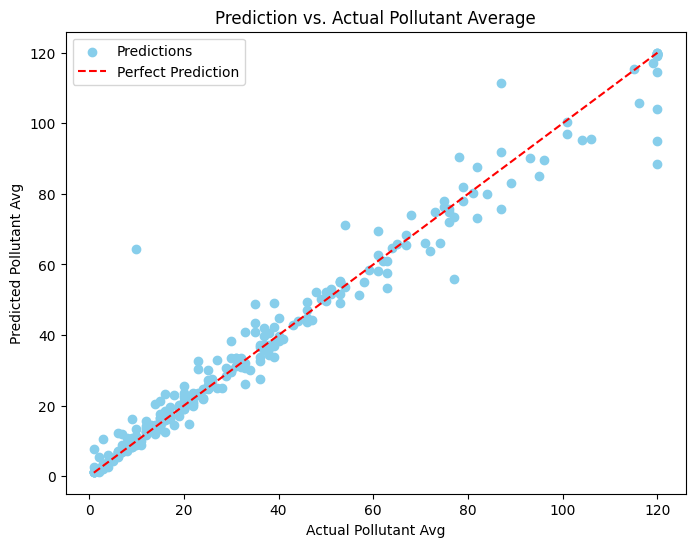

<ipython-input-13-d3f66dfaf993>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices][:10], y=np.array(feature_names)[sorted_indices][:10], palette='viridis')


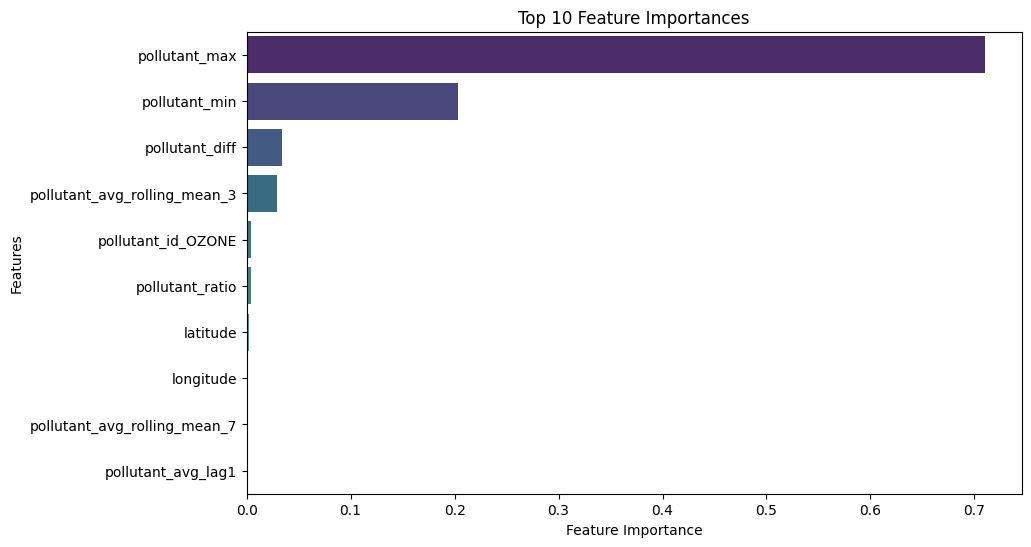

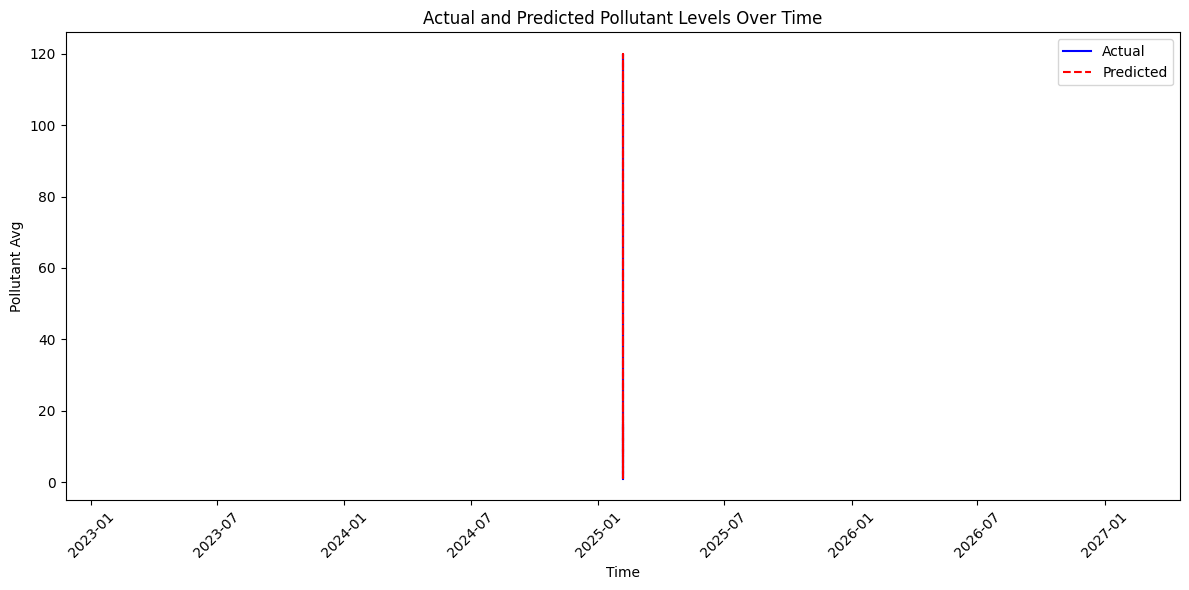

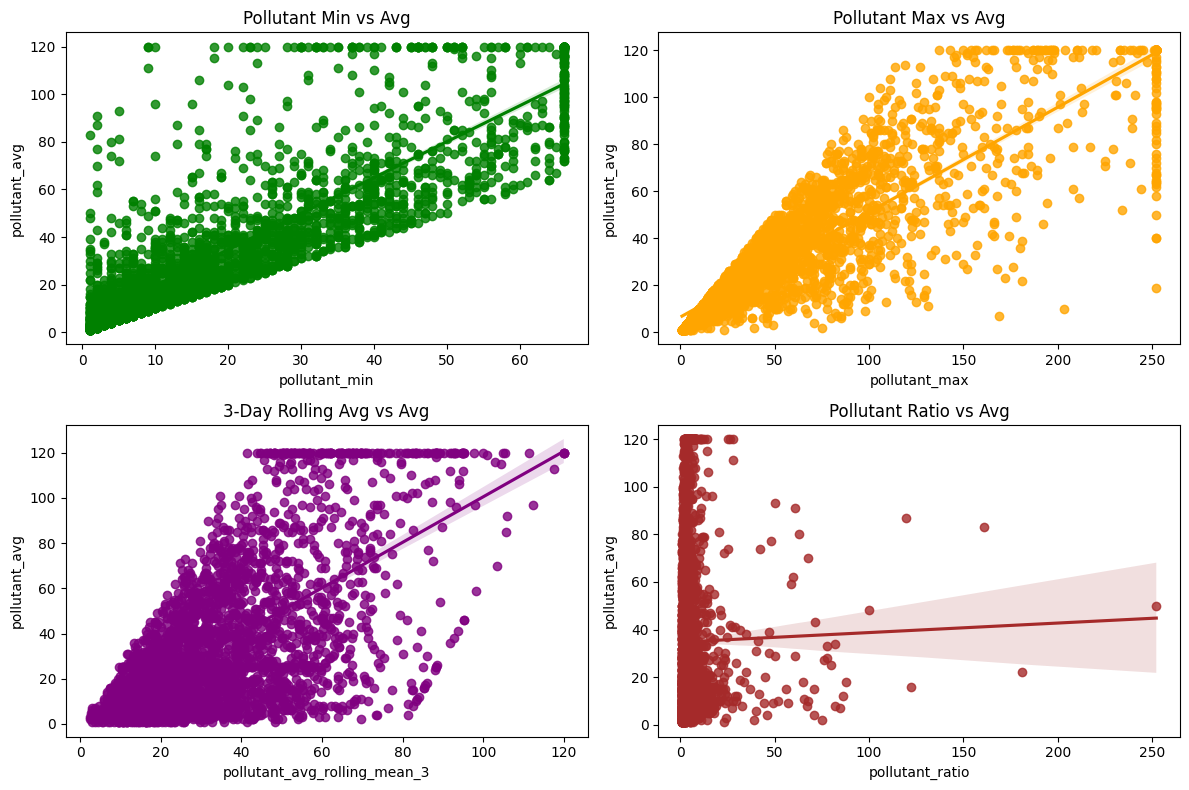

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prediction vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='skyblue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Pollutant Avg')
plt.ylabel('Predicted Pollutant Avg')
plt.title('Prediction vs. Actual Pollutant Average')
plt.legend()
plt.show()

# 2. Feature Importance
feature_importances = best_model.feature_importances_
feature_names = list(X_train_processed.columns) + list(enc.get_feature_names_out(categorical_cols))
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices][:10], y=np.array(feature_names)[sorted_indices][:10], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()


# 3. Pollutant Levels over Time
plt.figure(figsize=(12, 6))
plt.plot(X_test['last_update'], y_test, label='Actual', color='blue')
plt.plot(X_test['last_update'], y_pred_test, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Pollutant Avg')
plt.title('Actual and Predicted Pollutant Levels Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Relationship with Key Features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='pollutant_min', y='pollutant_avg', data=df, color='green')
plt.title('Pollutant Min vs Avg')

plt.subplot(2, 2, 2)
sns.regplot(x='pollutant_max', y='pollutant_avg', data=df, color='orange')
plt.title('Pollutant Max vs Avg')

plt.subplot(2, 2, 3)
sns.regplot(x='pollutant_avg_rolling_mean_3', y='pollutant_avg', data=df, color='purple')
plt.title('3-Day Rolling Avg vs Avg')

plt.subplot(2, 2, 4)
sns.regplot(x='pollutant_ratio', y='pollutant_avg', data=df, color='brown')
plt.title('Pollutant Ratio vs Avg')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* **Data Cleaning:** Missing values in pollutant columns were imputed using the median, and outliers were capped at the 95th percentile. The 'last_update' column was converted to datetime objects.  Duplicate rows were removed.
* **Feature Engineering:** Several features were engineered, including time-based features (day of week, month, hour, cyclical encodings), rolling averages of pollutant levels, interaction features (ratio and difference of pollutant levels), and a lagged pollutant average.
* **Model Training & Optimization:** A RandomForestRegressor model was trained and its hyperparameters were optimized using RandomizedSearchCV. The best hyperparameters found were `{'max_depth': 16, 'max_features': 0.9446974381141752, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}`.
* **Model Evaluation:** The model achieved a strong performance on the validation set with an MAE of 2.01, RMSE of 3.32, and R2 of 0.989.  On the test set, the model achieved an MAE of 2.58, RMSE of 5.50, and R2 of 0.969.  The slightly lower performance on the test set compared to the validation set suggests possible slight overfitting.
* **Feature Importance:**  Feature importance analysis was conducted to reveal the most influential features in the model's predictions.


### Insights or Next Steps

* **Investigate Overfitting:** The slight performance drop from the validation to the test set suggests potential overfitting. Explore regularization techniques or different model architectures to improve generalization.  Consider a simpler model or adding more data.
* **Explore Other Models:** Evaluate alternative regression models (e.g., Gradient Boosting, XGBoost) to see if they can achieve better performance or robustness.  Compare the results to determine the best performing model.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns # Removed the extra indent here

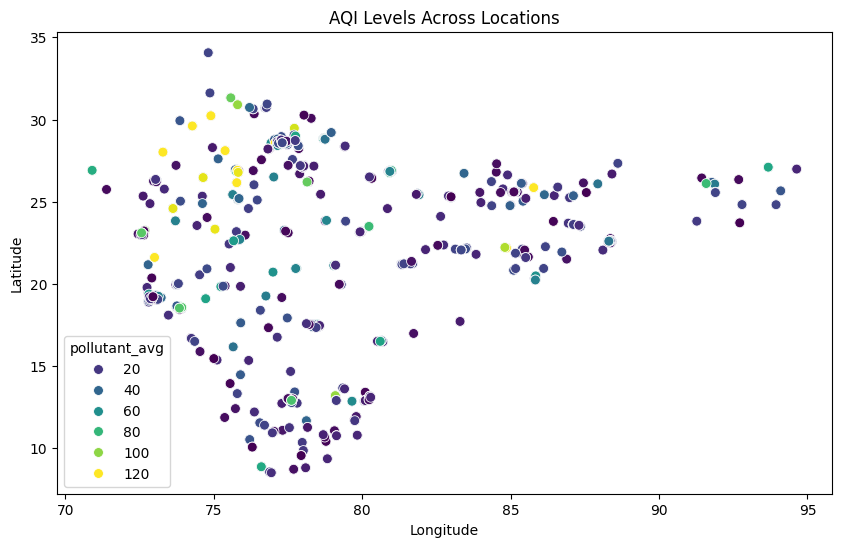

In [17]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='longitude', y='latitude', hue='pollutant_avg', data=df, palette='viridis', s=50)
plt.title('AQI Levels Across Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

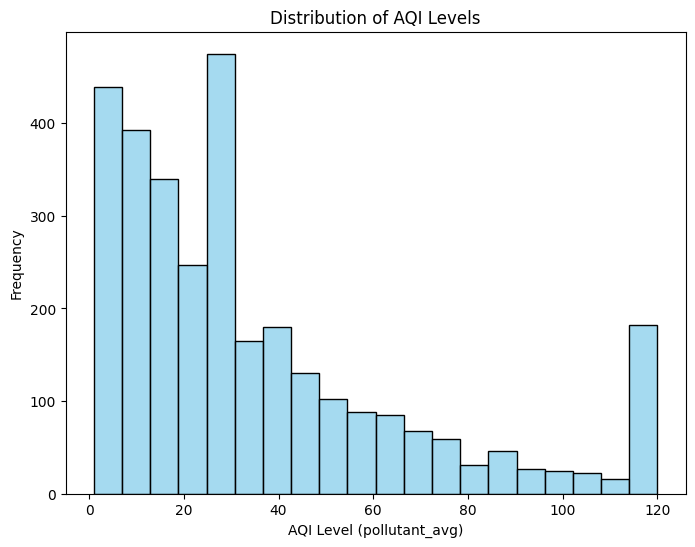

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['pollutant_avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI Levels')
plt.xlabel('AQI Level (pollutant_avg)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-5a3af6f601df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='pollutant_avg', data=df, palette='pastel')


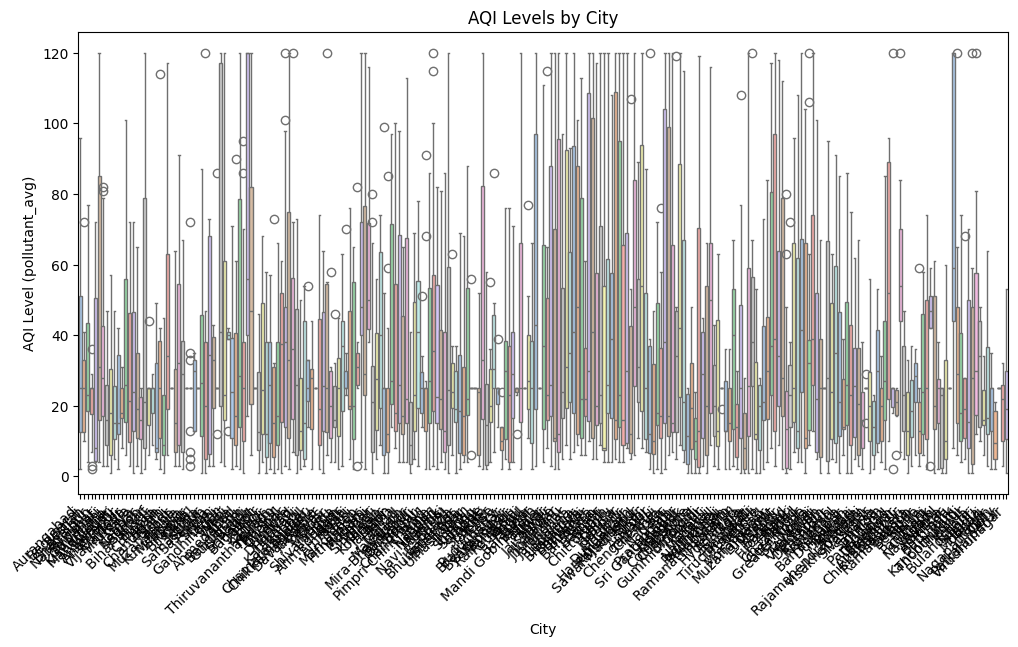

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='pollutant_avg', data=df, palette='pastel')
plt.title('AQI Levels by City')
plt.xlabel('City')
plt.ylabel('AQI Level (pollutant_avg)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler # Import the necessary class
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

def check_alert(aqi):
    if aqi <= 50:
        return "Good ✅"
    elif aqi <= 100:
        return "Moderate ⚠️"
    else:
        return "Unhealthy 🚨 — Take precautions!"

# Assuming 'enc' and 'categorical_cols' are defined in your previous code
# and 'X_train' is available
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ['country', 'state', 'city', 'station', 'pollutant_id']
enc.fit(X_train[categorical_cols])


# Example usage
# Define sample input with features corresponding to the training data
# **Make sure all necessary columns are present and have the correct data types**
sample_input_dict = {
    'country': ['India'],
    'state': ['Delhi'],
    'city': ['Delhi'],
    'station': ['Punjabi Bagh'],
    'pollutant_id': ['PM2.5'],
    'pollutant_min': [110],
    'pollutant_max': [180],
    'pollutant_avg_rolling_mean_3': [25],
    'pollutant_avg_rolling_std_3': [10] # Corrected indentation for this line
    # Add the remaining columns with their corresponding values as needed
    # following the format of the existing entries in the dictionary.
} # Corrected indentation for the end of the dictionary

In [34]:
print(f"Model Accuracy (R2): {r2_test}")

Model Accuracy (R2): 0.9689294714614315
